1. Генерація даних

Згенеруйте 1000 спостережень для ознаки "Площа житла" (площа квартири в квадратних метрах) в діапазоні від 50 до 200 квадратних метрів.

Згенеруйте 1000 спостережень для ознаки "Кількість спалень" в діапазоні від 1 до 5 спалень.

Згенеруйте 1000 спостережень для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км.

Згенеруйте цільову змінну - ціну житла (в тисячах доларів) на основі ознак "Площа житла", "Кількість спалень" та "Відстань до центру міста". Модель ціни може бути, наприклад, такою: ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка, де похибка - це випадковий шум.

In [2]:
import pandas as pd
import numpy as np

np.random.seed(0)     

area_count = np.random.randint(50, 200, size=1000)
rooms_count = np.random.randint(1, 5, size=1000)
distance_count = np.random.randint(1, 20, size=1000)
prices_count = [10 * a + 5 * b - 2 * d + np.random.randint(0, 40) for a, b, d in zip(area_count, rooms_count, distance_count)]


data = {
    'Площа житла': area_count,
    'К-сть спалень': rooms_count,
    'Відстань до центру': distance_count,
    'Ціна житла': prices_count
}

df = pd.DataFrame(data)      

df.to_csv('дані_нерухомості.csv', index=False)
df

,Площа житла,К-сть спалень,Відстань до центру,Ціна житла
0,97,4,2,1004
1,167,1,13,1684
2,117,1,10,1176
3,153,2,12,1544
4,59,1,4,620
...,...,...,...,...
995,169,3,11,1712
996,77,3,12,800
997,101,4,16,1018
998,128,2,7,1309


2. Розділення даних

Розділіти дані на навчальний та тестовий набори в співвідношенні 80% - 20%.

In [3]:
data = pd.read_csv('дані_нерухомості.csv')

print(data.head(), "\n") # * Перші декілька рядків даних

print(data.describe(), "\n") # * Основні статистичні показники даних

print(data.info(), "\n") # * Інформація про дані

   Площа житла  К-сть спалень  Відстань до центру  Ціна житла
0           97              4                   2        1004
1          167              1                  13        1684
2          117              1                  10        1176
3          153              2                  12        1544
4           59              1                   4         620 

       Площа житла  К-сть спалень  Відстань до центру  Ціна житла
count  1000.000000    1000.000000         1000.000000  1000.00000
mean    127.241000       2.506000           10.210000  1283.90900
std      43.189423       1.131036            5.335388   431.41831
min      50.000000       1.000000            1.000000   489.00000
25%      89.000000       1.000000            6.000000   899.00000
50%     131.000000       2.500000           10.000000  1327.00000
75%     165.000000       4.000000           15.000000  1660.00000
max     199.000000       4.000000           19.000000  2026.00000 

<class 'pandas.core.frame.Data

In [4]:
X = data[['Площа житла', 'К-сть спалень', 'Відстань до центру']]
y = data['Ціна житла']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Побудова моделі регресії

Використати бібліотеку Python (наприклад, Scikit-Learn) для побудови моделі лінійної регресії.

Навчіти модель на навчальних даних, використовуючи ознаки "Площа житла", "Кількість спалень" та "Відстань до центру міста" для прогнозу ціни житла.

In [5]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

4. Оцінка моделі

Оцінити якість моделі за допомогою метрик, таких як середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2).

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

r2 = r2_score(y_test, y_pred)     
print(f'R-squared: {r2:.2f}')  

MSE: 145.47
R-squared: 1.00


5. Візуалізація результатів

Побудувати графік, на якому відображено реальні ціни житла та прогнозовані моделлю ціни для тестового набору.

Додати лінію, яка відображає ідеальні результати (реальні ціни житла) для порівняння.

Text(0.5, 1.0, 'Лінійна регресія')

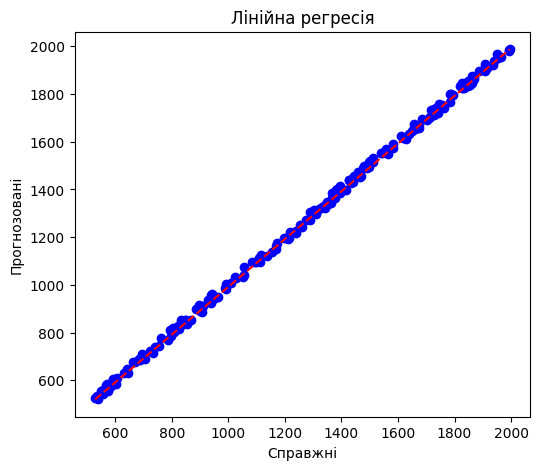

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.xlabel("Справжні")
plt.ylabel("Прогнозовані")
plt.title("Лінійна регресія")